# Feedback Trend Analysis Over Time
# Customer Support on Twitter from Kaggle

In [2]:
# Importing all the necessary files
import pandas as pd
df = pd.read_csv("data_source/twcs.csv")
import matplotlib.pyplot as plt
import string
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import seaborn as sns
from wordcloud import WordCloud
import datetime
import re


In [3]:
df.shape


(2811774, 7)

In [4]:
df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [4]:
# Text-preprocessing
# converting text column into string.
df["text"] = df["text"].astype(str)
#converting to lower case
df["text"] = df["text"].str.lower()

# Removal of punctuation
punct_to_remove = string.punctuation
def remove_punctuation(text): # this is a custom function to remove punctuations
    return text.translate(str.maketrans("", "", punct_to_remove))
df["processed_text"] = df["text"].apply(lambda text: remove_punctuation(text))
df.head()

# Removal of stopwords
import nltk
#download the stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

#  use the stopwords
stop_words = stopwords.words("english")
print(", ".join(stop_words))
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):       #using function to remove stop words
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df["processed_text"] = df["processed_text"].apply(lambda text: remove_stopwords(text))

# Stemming
# Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["processed_text"] = df["processed_text"].apply(lambda text: stem_words(text))
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\A\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, must

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,processed_text
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 i understand. i would like to assist y...,2,3.0,115712 understand would like assist would need...
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0,sprintcar propos
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare i have sent several private messag...,1,4.0,sprintcar sent sever privat messag one respond...
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 please send us a private message so th...,3,5.0,115712 pleas send us privat messag assist clic...
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare i did.,4,6.0,sprintcar


In [5]:
# Filter the data to focus on customer feedback
customer_feedback_keywords = ['customer support', 'help', 'issue', 'complaint', 'query', 'problem']
filtered_data = df[df['processed_text'].str.contains('|'.join(customer_feedback_keywords), case=False)]
print(filtered_data)

         tweet_id       author_id  inbound                      created_at  \
28             34  VerizonSupport    False  Tue Oct 31 22:13:33 +0000 2017   
29             35          115719     True  Tue Oct 31 22:49:16 +0000 2017   
31             36          115719     True  Tue Oct 31 22:10:46 +0000 2017   
35             41          115721     True  Tue Oct 31 22:24:55 +0000 2017   
61             68  ChipotleTweets    False  Tue Oct 31 22:14:00 +0000 2017   
...           ...             ...      ...                             ...   
2811745   2987924          823860     True  Wed Nov 29 22:31:37 +0000 2017   
2811749   2987928          385866     True  Wed Nov 29 22:20:52 +0000 2017   
2811752   2987931         UPSHelp    False  Thu Nov 30 07:56:27 +0000 2017   
2811755   2987934          823864     True  Thu Nov 30 01:40:49 +0000 2017   
2811757   2987937          823865     True  Thu Nov 30 01:39:12 +0000 2017   

                                                      text resp

In [6]:
# Remove emoji from filtered data
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

filtered_data.loc[:,'processed_text'] = filtered_data['processed_text'].apply(remove_emoji)
print(filtered_data)


         tweet_id       author_id  inbound                      created_at  \
28             34  VerizonSupport    False  Tue Oct 31 22:13:33 +0000 2017   
29             35          115719     True  Tue Oct 31 22:49:16 +0000 2017   
31             36          115719     True  Tue Oct 31 22:10:46 +0000 2017   
35             41          115721     True  Tue Oct 31 22:24:55 +0000 2017   
61             68  ChipotleTweets    False  Tue Oct 31 22:14:00 +0000 2017   
...           ...             ...      ...                             ...   
2811745   2987924          823860     True  Wed Nov 29 22:31:37 +0000 2017   
2811749   2987928          385866     True  Wed Nov 29 22:20:52 +0000 2017   
2811752   2987931         UPSHelp    False  Thu Nov 30 07:56:27 +0000 2017   
2811755   2987934          823864     True  Thu Nov 30 01:40:49 +0000 2017   
2811757   2987937          823865     True  Thu Nov 30 01:39:12 +0000 2017   

                                                      text resp

In [7]:
print(filtered_data.columns)

Index(['tweet_id', 'author_id', 'inbound', 'created_at', 'text',
       'response_tweet_id', 'in_response_to_tweet_id', 'processed_text'],
      dtype='object')


In [ ]:
# Convert 'created_at' column to datetime if not already done
filtered_data['created_at'] = pd.to_datetime(filtered_data['created_at'], errors='coerce')

# Drop rows with NaT values in 'created_at'
filtered_data = filtered_data.dropna(subset=['created_at'])

# Group data by date and count the number of tweets for each date
tweet_counts = filtered_data.groupby(filtered_data['created_at'].dt.date).size()

# Plot tweet volume over time
plt.figure(figsize=(10, 6))
tweet_counts.plot(kind='line', color='blue', marker='o')
plt.title('Customer Support Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Calculate sentiment scores
filtered_data['sentiment'] = filtered_data['text'].apply(lambda tweet: sid.polarity_scores(tweet)['compound'])

# Print some example sentiment scores
print(filtered_data[['text', 'sentiment']].head())

# Group by date and calculate average sentiment score for each day
daily_sentiment = filtered_data.groupby(filtered_data['created_at'].dt.date)['sentiment'].mean()

# Plot average sentiment over time
plt.figure(figsize=(10, 6))
daily_sentiment.plot(kind='line', color='green', marker='o')
plt.title('Average Sentiment of Customer Support Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()

C:\Users\A\AppData\Local\Temp\ipykernel_22328\3429873818.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  filtered_data['created_at'] = pd.to_datetime(filtered_data['created_at'], errors='coerce')


In [ ]:
# Analyze the sentiments
# Apply the sentiment analysis
filtered_data['sentiment'] = filtered_data['text'].apply(lambda tweet: sid.polarity_scores(tweet)['compound'])

# Classify the sentiment based on the compound score
def classify_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

filtered_data['sentiment_class'] = filtered_data['sentiment'].apply(classify_sentiment)

# Count the number of each sentiment
sentiment_counts = filtered_data['sentiment_class'].value_counts()

# Display the counts
print(sentiment_counts)

# Optional: Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [ ]:
# Checking the tweet distribution over the holiday
# Define the months of interest (December and January)
holiday_season_start = '2017-12-01'
holiday_season_end = '2018-01-31'
holiday_season = pd.date_range(start=holiday_season_start, end=holiday_season_end)

# Filter tweets by holiday season
holiday_tweets = filtered_data[(filtered_data['created_at'] >= holiday_season_start) & (filtered_data['created_at'] <= holiday_season_end)]

# Count the number of tweets per day during the holiday season
holiday_tweet_counts = holiday_tweets['created_at'].dt.date.value_counts().sort_index()

# Display the counts
print(holiday_tweet_counts)

# Optional: Plot the tweet interaction over the holiday season
plt.figure(figsize=(10, 6))
holiday_tweet_counts.plot(kind='line', marker='o', color='blue')
plt.title('Customer Support Tweets Over Holiday Season')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
#  Identify Common Issues During the Holiday Season
from collections import Counter
import re
from wordcloud import WordCloud

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    return text

# Preprocess the text in holiday tweets
holiday_tweets['cleaned_text'] = holiday_tweets['processed_text'].apply(preprocess_text)

# Combine all tweets into a single string
all_holiday_text = ' '.join(holiday_tweets['cleaned_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_holiday_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Issues in Customer Support Tweets Over Holiday Season')
plt.show()

# Optional: Display the most common words
common_words = Counter(all_holiday_text.split()).most_common(10)
print(common_words)



sentiment_category
positive    20015
neutral      7221
negative     6201
Name: count, dtype: int64


C:\Users\Vinnie\AppData\Local\Temp\ipykernel_1824\1775048194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holiday_tweets['sentiment'] = holiday_tweets['processed_text'].apply(lambda tweet: sid.polarity_scores(tweet)['compound'])
C:\Users\Vinnie\AppData\Local\Temp\ipykernel_1824\1775048194.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holiday_tweets['sentiment_category'] = holiday_tweets['sentiment'].apply(lambda score: 'positive' if score > 0.05 else ('negative' if score < -0.05 else 'neutral')

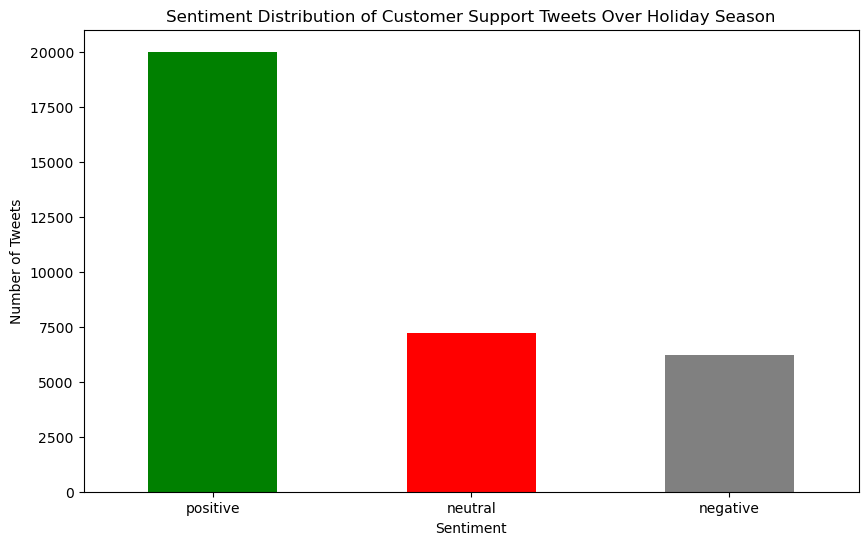

In [26]:
# Sentiment Analysis Over the Holiday Season
# Perform sentiment analysis on holiday tweets
holiday_tweets['sentiment'] = holiday_tweets['processed_text'].apply(lambda tweet: sid.polarity_scores(tweet)['compound'])

# Categorize sentiment
holiday_tweets['sentiment_category'] = holiday_tweets['sentiment'].apply(lambda score: 'positive' if score > 0.05 else ('negative' if score < -0.05 else 'neutral'))

# Count the number of positive, negative, and neutral tweets
sentiment_counts = holiday_tweets['sentiment_category'].value_counts()

# Display sentiment counts
print(sentiment_counts)

# Optional: Plot sentiment distribution
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution of Customer Support Tweets Over Holiday Season')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()


In [33]:
print(filtered_data.columns)

Index(['tweet_id', 'author_id', 'inbound', 'text', 'response_tweet_id',
       'in_response_to_tweet_id', 'processed_text', 'sentiment',
       'sentiment_class'],
      dtype='object')


In [ ]:
# Set the index to 'created_at' for time series analysis
filtered_data.set_index('created_at', inplace=True)
print(filtered_data.index)

C:\Users\Vinnie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vinnie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


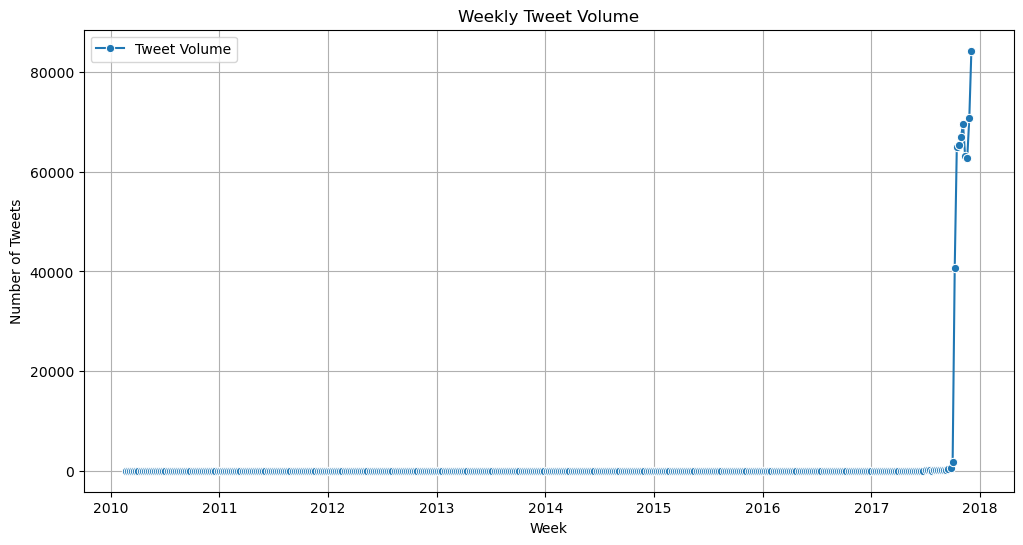

C:\Users\Vinnie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vinnie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


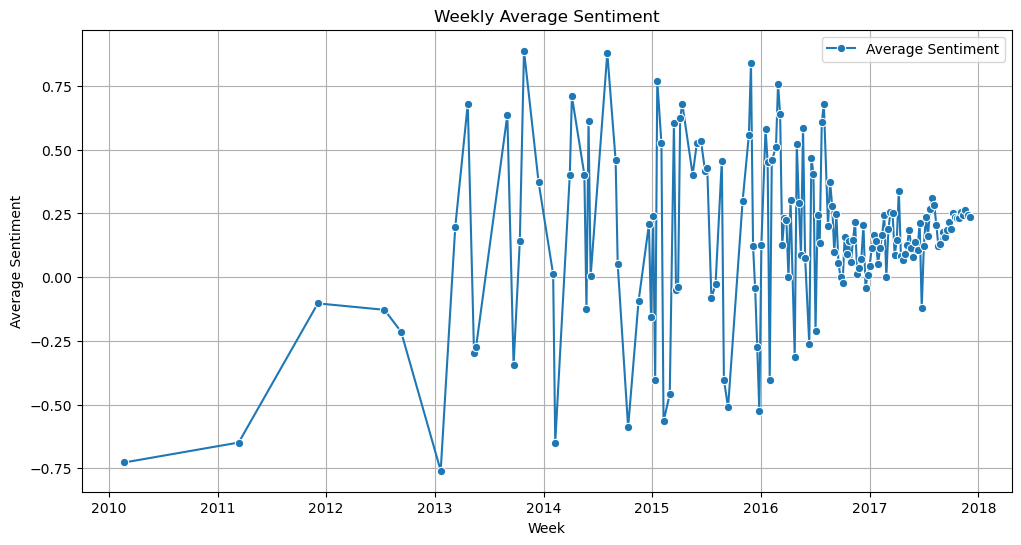

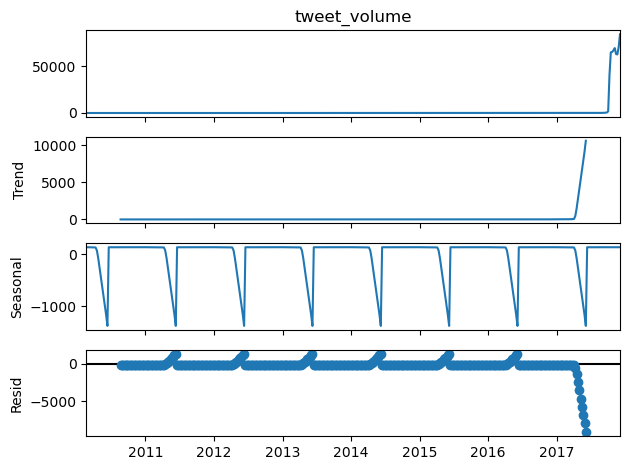

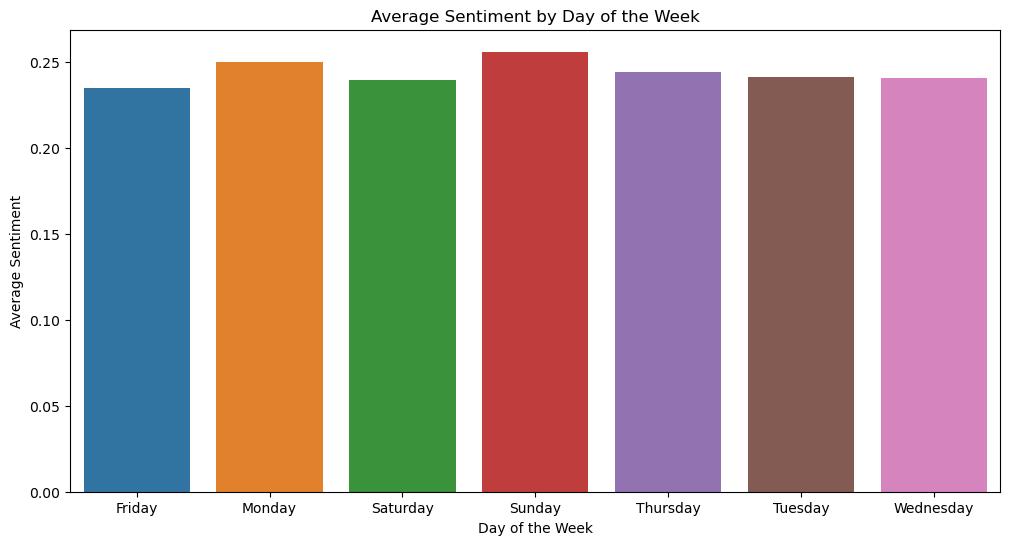

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample the data to weekly frequency and calculate the number of tweets and average sentiment
weekly_data = filtered_data.resample('W').agg({'processed_text': 'count', 'sentiment': 'mean'})
weekly_data.rename(columns={'processed_text': 'tweet_volume', 'sentiment': 'avg_sentiment'}, inplace=True)

# Plot weekly tweet volume
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_data['tweet_volume'], marker='o', label='Tweet Volume')
plt.title('Weekly Tweet Volume')
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

# Plot weekly average sentiment
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_data['avg_sentiment'], marker='o', label='Average Sentiment')
plt.title('Weekly Average Sentiment')
plt.xlabel('Week')
plt.ylabel('Average Sentiment')
plt.grid(True)
plt.show()

# Seasonal decomposition of tweet volume
decomposition = seasonal_decompose(weekly_data['tweet_volume'], model='additive')
decomposition.plot()
plt.show()

# Sentiment by day of the week
filtered_data['day_of_week'] = filtered_data.index.day_name()
sentiment_by_day = filtered_data.groupby('day_of_week')['sentiment'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=sentiment_by_day.index, y=sentiment_by_day.values)
# Add legend
#plt.legend(title='Mood', loc='upper right')
plt.title('Average Sentiment by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sentiment')
plt.show()

In [46]:
print(filtered_data.index)


DatetimeIndex(['2017-10-31 22:13:33+00:00', '2017-10-31 22:49:16+00:00',
               '2017-10-31 22:10:46+00:00', '2017-10-31 22:24:55+00:00',
               '2017-10-31 22:14:00+00:00', '2017-10-31 22:09:00+00:00',
               '2017-10-31 22:06:55+00:00', '2017-10-31 22:17:05+00:00',
               '2017-10-31 22:06:34+00:00', '2017-10-31 22:09:13+00:00',
               ...
               '2017-11-30 07:27:11+00:00', '2017-11-30 07:31:54+00:00',
               '2017-11-30 08:19:49+00:00', '2017-11-29 22:33:14+00:00',
               '2017-11-30 07:56:29+00:00', '2017-11-29 22:31:37+00:00',
               '2017-11-29 22:20:52+00:00', '2017-11-30 07:56:27+00:00',
               '2017-11-30 01:40:49+00:00', '2017-11-30 01:39:12+00:00'],
              dtype='datetime64[ns, UTC]', name='created_at', length=592852, freq=None)
